In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(scales)
library(repr)
library(stringr)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
training_data <- read_csv("data/Training_Data.csv")
training_data

Parsed with column specification:
cols(
  STG = col_double(),
  SCG = col_double(),
  STR = col_double(),
  LPR = col_double(),
  PEG = col_double(),
  UNS = col_character()
)



STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


In [3]:
data_summary <- training_data %>%
                group_by(UNS) %>%
                summarize(n = n()) %>%
                arrange(desc(n))
data_summary

`summarise()` ungrouping output (override with `.groups` argument)



UNS,n
<chr>,<int>
Middle,88
Low,83
High,63
very_low,24


In [4]:
data_summary_wider <- pivot_wider(data_summary,  names_from = UNS,  values_from = n)
data_summary_wider

Middle,Low,High,very_low
<int>,<int>,<int>,<int>
88,83,63,24


In [5]:
training_data_summary_stats <- summarize(training_data,  mean_STG = mean(STG), mean_SCG = mean(SCG),  mean_STR = mean(STR), mean_LPR = mean(LPR), mean_PEG = mean(PEG)) 

In [6]:
final_summary <- merge(training_data_summary_stats, data_summary_wider)

final_summary

mean_STG,mean_SCG,mean_STR,mean_LPR,mean_PEG,Middle,Low,High,very_low
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
0.3711473,0.3556744,0.4680039,0.4327132,0.4585388,88,83,63,24


In [7]:
training_data

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


 visualize the training_data to see different levels of UNS

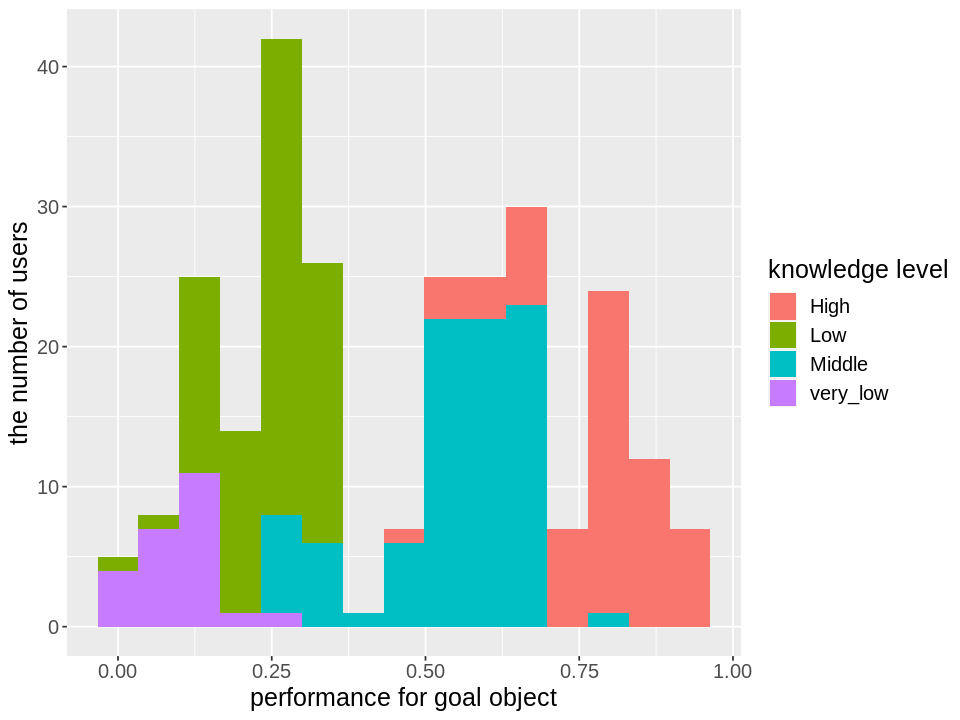

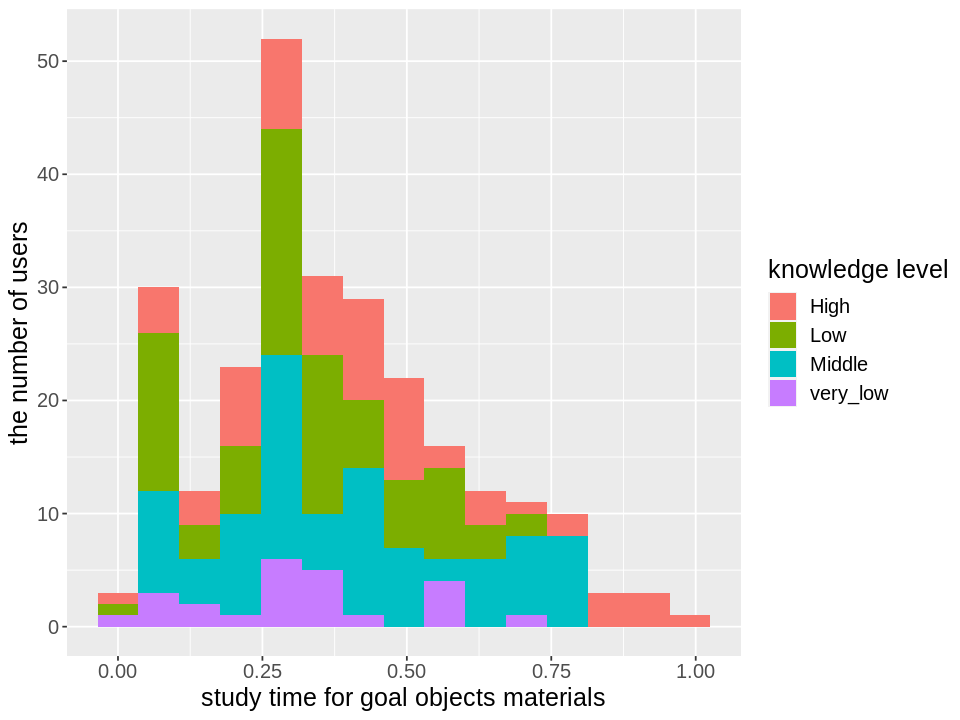

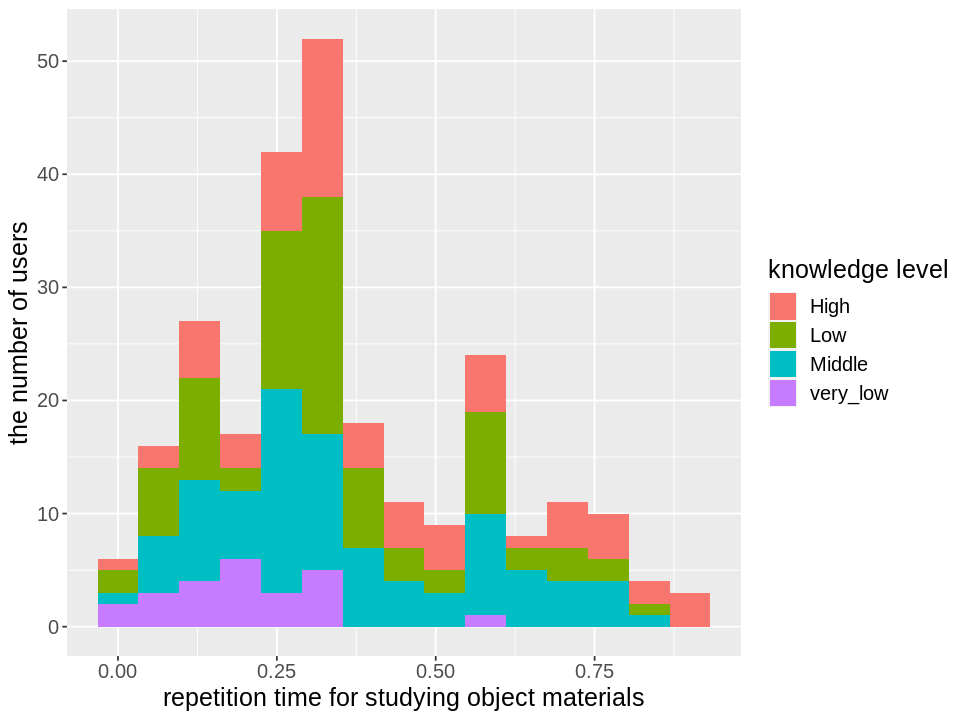

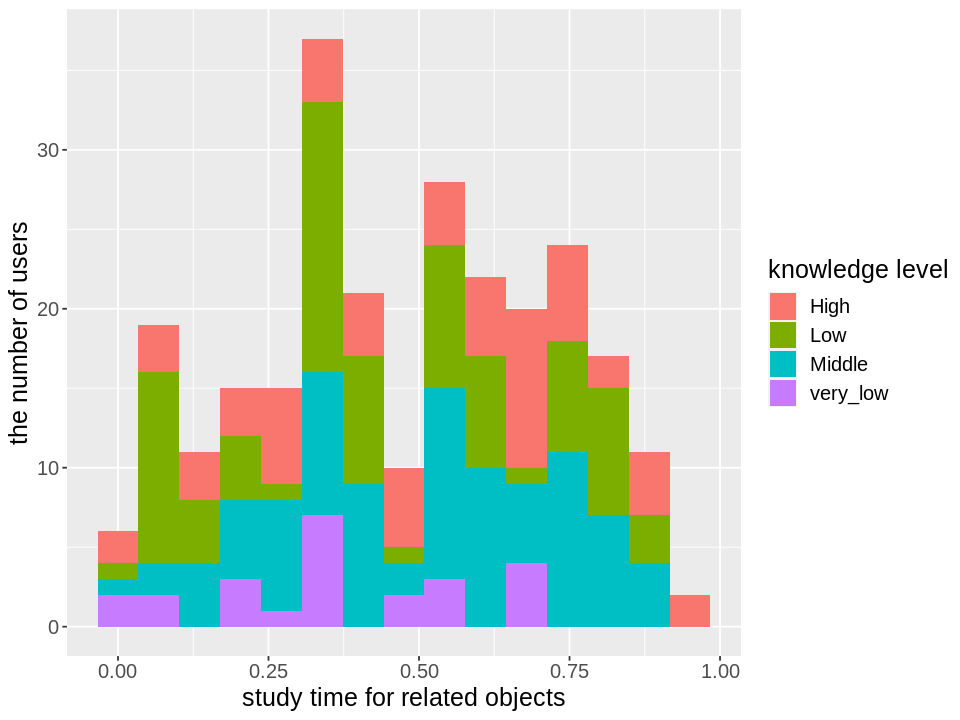

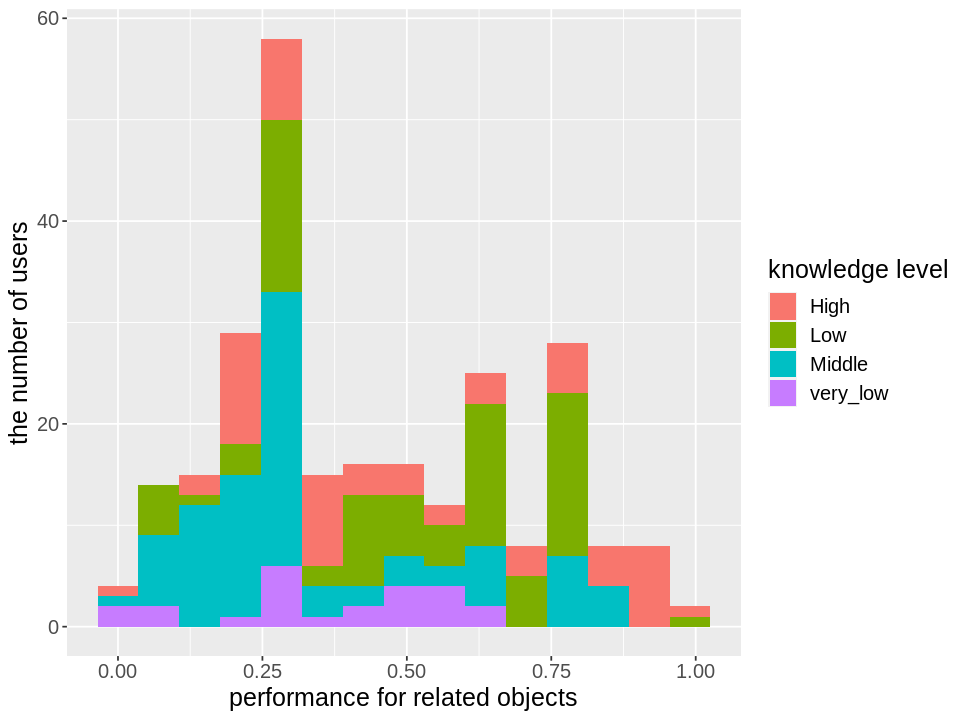

In [8]:
options(repr.plot.width = 8, repr.plot.height = 6)

PEG_histogram <- training_data %>%
                  ggplot(aes(x=PEG,fill=UNS, stat="identity"))+
                  geom_histogram(bins=15)+
                  labs(x="performance for goal object", y="the number of users",fill="knowledge level")+
                  theme(text = element_text(size = 15))
PEG_histogram

STG_histogram <- training_data %>%
                  ggplot(aes(x=STG,fill=UNS, stat="identity"))+
                  geom_histogram(bins=15)+
                  labs(x="study time for goal objects materials", y="the number of users",fill="knowledge level")+
                  theme(text = element_text(size = 15))
STG_histogram

SCG_histogram <- training_data %>%
                  ggplot(aes(x=SCG,fill=UNS, stat="identity"))+
                  geom_histogram(bins=15)+
                  labs(x="repetition time for studying object materials", y="the number of users",fill="knowledge level")+
                  theme(text = element_text(size = 15))
SCG_histogram

STR_histogram <- training_data %>%
                  ggplot(aes(x=STR,fill=UNS, stat="identity"))+
                  geom_histogram(bins=15)+
                  labs(x="study time for related objects", y="the number of users",fill="knowledge level")+
                  theme(text = element_text(size = 15))
STR_histogram

LPR_histogram <- training_data %>%
                  ggplot(aes(x=LPR,fill=UNS, stat="identity"))+
                  geom_histogram(bins=15)+
                  labs(x="performance for related objects", y="the number of users",fill="knowledge level")+
                  theme(text = element_text(size = 15))
LPR_histogram

Based on above five histogram, I discover that PEG is the only effective predictor for UNS because distributions of other four variables look like very similar. As a result, We will use PEG, the exam performance of goal objects, as predictor to predict UNS level of unknown users.

To effectively predict the UNS level, We will use k-nearest neighbour classification algorithm and set k=7 to guarantee the generality.